In [23]:
import random

In [24]:
sentence = """
句子 = 主  谓  宾
主语 = 你 | 我 | 他
谓语 = 吃 | 喝
宾语 = 青菜 | 黄瓜 | 西红柿 | 果汁
"""

In [25]:
def sentence():
    return 主语() + 谓语() + 宾语()

def 主语():
    return random.choice('你 | 我 | 他'.split('|'))

def 谓语():
    return random.choice('吃 | 喝'.split('|'))
    
def 宾语():
    return random.choice('青菜 | 黄瓜 | 西红柿 | 果汁'.split('|'))

In [26]:
for _ in range(10):
    print(sentence())

你 吃  西红柿 
 他吃  西红柿 
你  喝 西红柿 
你  喝 黄瓜 
 我 吃  西红柿 
你  喝 果汁
 他 喝 黄瓜 
 我  喝 西红柿 
 他 喝 黄瓜 
 我  喝 黄瓜 


In [27]:
two_numbers = """
numbers = num numbers | num
num = 0 | 1 | 2 | 3 
"""

In [28]:
# def numbers_with_bug():
#     return random.choice([num() + numbers_with_bug(),num()])

def num():
    return random.choice('0 | 1 | 2 | 3'.split('|'))

def numbers():
    if random.random()<0.3:
        return num()
    else:
        return num() + numbers()

In [29]:
numbers()

' 3 1 0 '

In [30]:
for _ in range(10):
    print(numbers())

 1  1 0  1  3 1  3
 1 0  2 0  1 0 
 2 
 30  1 0 0  2  2  3
 1  3 2 
 2 
 1 
 2 0  2  3 2 
 2 0  1 
 3 1  3 3


In [31]:
numbers_ops = """
expression => expression op num_op | num_op
num_op => nums op nums
nums => num nums | num
num => 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
op => + | - | * | /
"""

In [32]:
def generate_grammer(grammer_str:str, split='=>'):
    grammar = {}

    for line in grammer_str.split('\n'):
        if not line: continue

        expr, formula = line.split(split)
        formulas = formula.split('|')

        formulas = [f.split() for f in formulas]

        grammar[expr.strip()] = formulas

    return grammar
    

In [33]:
def generate_by_grammer(grammar: dict, target=str):
    if target not in grammar: return target 
    
    expr = random.choice(grammar[target])
    
    return ''.join(generate_by_grammer(grammar, t) for t in expr)

In [34]:
grammar=generate_grammer(numbers_ops)

In [35]:
generate_by_grammer(grammar,target='expression')

'2*38/1/6158+8+3'

In [36]:
def generate_by_str(grammar_str,target,spliter='=>'):
    return generate_by_grammer(grammar=generate_grammer(grammar_str,spliter),target=target)

In [37]:
sentence = """
句子 => 主  谓  宾
主 => 你 | 我 | 他
谓 => 吃 | 喝
宾 => 青菜 | 黄瓜 | 西红柿 | 果汁
"""

In [38]:
generate_by_str(numbers_ops,target='expression')

'822762-2+06/1377'

In [39]:
for _ in range(10):
    print(generate_by_grammer(generate_grammer(sentence),target='句子'))

他吃青菜
你吃青菜
我吃青菜
你吃青菜
你吃西红柿
我吃青菜
我喝果汁
你吃果汁
我喝黄瓜
你吃青菜


In [40]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""
假如既然 = """
句子 = if someone state , then do something
if = 既然 | 如果 | 假设
someone = one 和 someone | one
one = 小红 | 小蓝 | 小绿 | 白白
state = 饿了 | 醒了 | 醉了 | 癫狂了
then = 那么 | 就 | 可以
do = 去  
something = 吃饭 | 玩耍 | 去浪 | 睡觉
"""
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 具体业务
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [41]:
for _ in range(10):
    print(generate_by_str(human,'human', '='))

for _ in range(10):
    print(generate_by_str(假如既然,'句子','='))

for _ in range(10):
    print(generate_by_str(host,'host','='))

俺找找乐子
俺找找乐子
我想找点乐子
我想找点乐子
我们找找玩的
俺找找玩的
俺想找点玩的
我们找找玩的
我找找玩的
我们想找点乐子
既然小蓝和小红醉了,那么去睡觉
如果小绿癫狂了,可以去吃饭
如果小绿和白白癫狂了,那么去玩耍
如果小绿醉了,就去去浪
假设小红和小蓝和小蓝和小红和小绿醉了,就去吃饭
假设小蓝癫狂了,就去吃饭
假设小绿和小绿醒了,就去吃饭
既然小蓝醉了,就去睡觉
假设小蓝和白白和小蓝癫狂了,就去玩耍
既然小蓝和小红醉了,就去玩耍
您好我是492号,您需要喝酒吗？
您好我是3号,您需要打牌吗？
小朋友,您好我是973号,请问你要打牌吗？
你好我是72号,请问你要赌博吗？
你好我是27号,请问你要打牌吗？
小朋友,你好我是379号,请问你要打牌吗？
你好我是484号,您需要打牌吗？
您好我是6号,请问你要喝酒吗？
您好我是8号,您需要打牌吗？
小朋友,你好我是7165252号,请问你要喝酒吗？


In [42]:
simple_programming="""
programming => assignment logic_programming
assignment => assign change_line assignment | assign change_line
logic_programming => if_stmt | assign | while_loop
while_loop => while { cond } {change_line stmt change_line}
if_stmt =>if { cond } {change_line stmt change_line} | if { cond } {change_line stmt change_line} else {change_line stmt change_line}
change_line => /N
cond => var op var
op =>| == | < | >= | <= | && | **
stmt =>assign | if_stmt
assign => var = var
var => var _ num | words
words => words _ word | word
word => name | info | student | lib | database
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
"""

In [43]:
generate_by_str(simple_programming,'programming','=>')

'info=student_name_info_name_1_9/Nstudent_3_2=student/Ndatabase_7=database_name_database/Nif{student_database_name==name}{change_linename_student_database_lib_7_0=name_database_4_6change_line}'

In [44]:
def pretty_print(line):
    lines = line.split('/N')
    code_lines =[]
    for i,sen in enumerate(lines):
        if i < len(lines)/2:
            code_lines.append( i * " " + sen)
        else:
            code_lines.append((len(lines)-i) * " " + sen)
    return code_lines

In [45]:
# def pretty_print(line):
#     # utility tool function
#     lines = line.split('/N')
    
#     code_lines = []
    
#     for i, sen in enumerate(lines):
#         if i < len(lines) / 2: 
#             #print()
#             code_lines.append(i * "  " + sen)
#         else:
#             code_lines.append((len(lines) - i) * " " + sen)
    
#     return code_lines

In [46]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate_by_str(simple_programming,'programming','=>'))

In [47]:
generated_programming

['name_1=info_student_name_info_4',
 ' student_name_info=student',
 ' while{database_student_7>=info_2_7}{change_lineif{info_database_info_lib_6_4_8_9_0name}{change_lineinfo_5_6_0_6=database_info_info_0_6_9_6_5change_line}change_line}',
 'name=database_lib_student_lib',
 ' student_database_5=name',
 ' info_4_6_0=student_student_student_name_info_lib_database_info_3',
 'student_lib_student_info_name=student_database_info_student_name',
 ' lib=info_info_info_student_database_9_3',
 '  name_name_student_lib_9_7_4_4_8_4_8=name_9_0_4_1',
 '  info_student_name_7_5_3=name_database_info_9_5',
 ' info_name=student_database',
 'student_student_student_database_student_2_4=info_database_7',
 ' database_lib_database=lib_student_7',
 ' if{lib_database<=name_database}{change_linename_info_database_lib_lib_8=databasechange_line}else{change_lineif{lib_student_lib_8==info_2}{change_lineif{lib_name<=student_5}{change_lineif{student_name_6_4<=lib}{change_lineif{database_info>=info}{change_lineif{student_

In [48]:
!ls

Lecture-01-Syntax-Tree-and-Language-Model.ipynb  assignments
Untitled.ipynb					 lesson-01-course-code.ipynb
Untitled1.ipynb					 lesson01-for-2020-summer.pptx
article_9k.txt					 train1.ipynb
article_9k_cut.txt


In [49]:
ARTILES = open('article_9k.txt').read()

In [50]:
len(ARTILES)

33425826

In [51]:
ARTILES[:100]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MI'

In [52]:
import jieba

In [53]:
def cut(string):return list(jieba.cut(string))

In [54]:
cut("今天星期一要上班")

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/home/stu_13282409439/.local/lib/python3.7/site-packages/jieba/__init__.py", line 154, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmpz8q8hi71' -> '/tmp/jieba.cache'
Loading model cost 0.923 seconds.
Prefix dict has been built successfully.


['今天', '星期一', '要', '上班']

In [55]:
ALL_TOKENS = cut(ARTILES)

In [56]:
ALL_TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [57]:
from collections import Counter

In [58]:
word_counts = Counter(ALL_TOKENS)

In [59]:
word_counts.most_common(50)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186)]

In [60]:
frequencies = [f for w,f in word_counts.most_common(100)]

In [61]:
x = [i for i in range(100)]

In [62]:
%matplotlib inline

In [63]:
import matplotlib.pyplot as plt

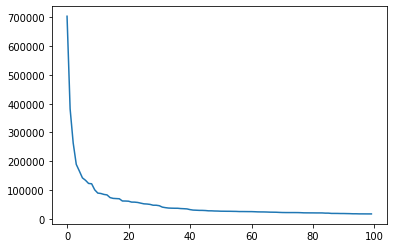

In [64]:
plt.plot(x,frequencies)

# 1_gram

In [65]:
most_common_500 = [w for w,f in word_counts.most_common(500)]

In [66]:
most_common_to_10000_100500 = [w for w,f in word_counts.most_common(50000)][500:]

In [67]:
''.join(random.sample(most_common_500,k=10))

'小去发生年该学习冠军中促进这种'

In [68]:
'-'.join(random.sample(most_common_500,k=10))

'路透-足球-但-巴黎-选手-还有-用户-比-自己-发布'

In [69]:
''.join(random.sample(most_common_to_10000_100500,k=10))

'中国工程院乡贤陶器维度全面推行互信出炉雁过拔毛活下去大手笔'

In [70]:
min_frequences = min([f for w, f in word_counts.most_common()])

def prob_1(word):
    if word in word_counts:
        return word_counts[word]/len(ALL_TOKENS)
    else:
        return min_frequences / len(ALL_TOKENS)

In [71]:
prob_1('中国')

0.004040071167097489

In [72]:
prob_1('美国')

0.0014465111014973448

In [73]:
from functools import reduce

In [74]:
from operator import mul

In [75]:
reduce(mul,range(1,9))

40320

In [76]:
def _1_gram(sentence):
    words = cut(sentence)
    
    return reduce(mul,[prob_1(w) for w in words])

In [77]:
_1_gram('我今天不上班')

5.893846668048513e-15

In [78]:
_1_gram('我今天开花')

2.282860481504227e-12

In [79]:
Pr(你 | 今天) = count(你今天)/ count(你)

SyntaxError: can't assign to function call (<ipython-input-79-34dc1048ca16>, line 1)

$$2-gram= 𝑃𝑟(𝑤_1∗𝑤_2..𝑤_𝑛)=\quad\prod_i^n\frac{𝑐𝑜𝑢𝑛𝑡(𝑤_𝑖𝑤_{𝑖+1})}{𝑐𝑜𝑢𝑛𝑡(𝑤_{𝑖+1})}𝑃𝑟(𝑤_𝑛)$$

In [80]:
TOKEN_2_GRAM = [''.join(ALL_TOKENS[i:i+2]) for i in range(len(ALL_TOKENS[:-2]))]

In [81]:
len(ALL_TOKENS)

17618254

In [82]:
len(TOKEN_2_GRAM)

17618252

In [83]:
# len(ALL_TOKENS[:-2])

In [84]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [85]:
word_count_2 = Counter(TOKEN_2_GRAM)

In [86]:
def prob_2(word1,word2):
    combine = word1+word2
    if combine in word_count_2:
        return word_count_2[combine] / word_counts[word2]
    else:
        return 1 / len(word_counts)
    
def _2_gram(sentence):
    words = cut(sentence)
    
    prob = 1
    
    for i in range(len(words)-1):
        word,next_word = words[i],words[i+1]
        
        prob *= prob_2(word,next_word)
        
    prob *=prob_1(words[-1])
    
    return prob

In [87]:
_2_gram('美国发射了一颗卫生')

6.899794487395517e-18

In [88]:
_2_gram('美国发射了一个水桶')

5.966101590759155e-15

In [89]:
need_compared = [
    ('今天晚上请你吃大餐，我们一起吃日料', '今天晚上请你吃大餐，我们一起吃苹果'),
    ('真是一只好看的小猫', '真事一只好看的小猫'),
    ('今晚我去吃火锅', '今晚火锅去吃我'),
    ('洋葱奶昔来一杯', '养乐多绿来一杯')
]

In [90]:
for s1, s2 in need_compared:
    print('Pr({})={}'.format(s1,_2_gram(s1)))
    print('Pr({})={}'.format(s2,_2_gram(s2)))

Pr(今天晚上请你吃大餐，我们一起吃日料)=1.5903389425741782e-45
Pr(今天晚上请你吃大餐，我们一起吃苹果)=8.703384317468003e-40
Pr(真是一只好看的小猫)=8.273018279582945e-22
Pr(真事一只好看的小猫)=3.0233993266831647e-27
Pr(今晚我去吃火锅)=1.7325227255339101e-18
Pr(今晚火锅去吃我)=1.4852604423993444e-20
Pr(洋葱奶昔来一杯)=7.580540796399728e-19
Pr(养乐多绿来一杯)=7.125708348615745e-17
